# Exam Agenda

## (a) Metrics/Evaluation of Classifiers

- Important to evaluate the models performance
- Different metrics used for different types of models
- Focus: Classification model
    - Recall classification model (Class 1 or 2)
- Present exercise
    - Task 2: Linear Classification Model which uses SVC
        - Split into 80 / 20
        - Model: predicts cats in pictures
    - Task 3: Confusion matrix
        - Summarises the performance of a classification problem
        - High accuracy = good model?
    - Task 4: Metrics
        - Precision
        - Recall
        - Specificity
        - F1-score
- What about imbalanced data sets?
    - Task 5

## (b) Metrics/Evaluation of Regression

- Go to [02-gaze.ipypb](../w6/02-gaze.ipynb)

## (c) Imbalanced data for classification and regression

- What is imbalanced data?
    - 90% / 10%
- Classification models
    - Draw example on board
    - Model: predicts cats in pictures
    - Leads to poor generatlisation
    - The metrics will be misleading
        - Scores high on accuracy
        - Inspect precision, recall and F1
            - If FN is low, recall will be low, indicating an imbalanced dataset!
    - Task 5 results
- Regression models
    - Less discussed, as regression deals with continuous variables
    - Loss function
        - RMSE or MAE
    - Example below: regression model from Gaze
    - Outliers might skew the model's prediction
    - See Task 2 in [w7/03-model-fitting](../w7/03-model_fitting_desc_stat.ipynb)

## (d) Focus on Cross validation

- What is Cross Validation?
    - A method to detect what parts of dataset should be used for training / testing
    - Improves general performance
- K-fold Cross Validation
    - K = 5 ... 10
    - Split data
    - Train on K-1
    - Test on remaining
    - Evaluate and record with appropriate metrics
        - Signs of overfitting
    - Repeat
- If more time, talk about imbalanced data

## (e) Focus on matching and metrics.

- What do we use template matching for?
- Draw on the blackboard
- Perform correlation with template kernel
    - Kernel multiplied by image
        - Bright pixels will give high values
    - Pixel by pixel
- Solution: Normalised Cross Correlation (NCC)
    - Hardcore math
    - Idea: normalise the data, so that brightness doesn't affect anymore
- Apply to real world
    - Facial recognition
    - Detect face of criminals in public (idk)

Note: Haven't done the exercise on flowers, but the images are nice - [open Dan's](https://iml.itu.dk/03-exercises/W08/02-filter_basics.html) 

![data](sparese-data-y.png)

# Evaluating Classifiers
This exercise is about evaluation metrics for binary classification. 
The main focus is to evaluate a classification model, irrespective of which model (linear or non-linear) is being used.
<article class="message is-info">
  <div class="message-header">Info</div>
  <div class="message-body">

  Recall that the confusion matrix for binary classification problems has the following structure:

$$
\begin{array}{cc|c|c|}
  & & \text{Predicted Negative} & \text{Predicted Positive} \\
\hline
\text{Actual Negative} & & TN & FP \\
\hline
\text{Actual Positive} & & FN & TP \\
\end{array}
$$
- **TN** - True Negative
- **FN** - False Negative 
- **FP** - False positive
- **TP** - True Positive



  </div>
</article>

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#import">Task 1: Generating Data</a>
            </li>
            <li>
            <a href="#First">Task 2: Training Support Vector Classifier</a>
            </li>
            <li>
            <a href="#accuracy">Task 3: Model accuracy</a>
            </li>
            <li>
            <a href="#classif_report">Task 4: Performance metrics</a>
            </li>
            <li>
            <a href="#svc_model">Task 5: Class Imbalance</a>
            </li>
            <li>
            <a href="#metrics">Task 6: ROC and Precision-Recall curves</a>
            </li>
        </ul>
    </div>
</article>

## Generating Data
<article class="message task"><a class="anchor" id="import"></a>
    <div class="message-header">
        <span>Task 1: Generating Data</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to generate a dataset comprising of 500 samples, 20 features, and 2 classes. This dataset is partitioned using an 80-20 train-test split.



</div></article>



In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, auc, average_precision_score, roc_curve
from sklearn.svm import SVC, LinearSVC
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings("ignore")


X,Y  = datasets.make_classification(n_samples=500, n_features=20, n_classes=2, random_state=1)
print('Dataset Size : ',X.shape,Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y, random_state=1)
print('Train/Test Size : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Dataset Size :  (500, 20) (500,)
Train/Test Size :  (400, 20) (100, 20) (400,) (100,)


## Performance Metrics
In the following task you will evaluate the model's performance on the test data using different metrics. 
<article class="message task"><a class="anchor" id="First"></a>
    <div class="message-header">
        <span>Task 2: Training Support Vector Classifier</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to train a Linear Support Vector Classifier ([`LinearSVC`
](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
).



</div></article>



In [80]:
classifier1 = LinearSVC(random_state=1, C=0.1)
classifier1.fit(X_train, Y_train)

LinearSVC(C=0.1, random_state=1)

<article class="message task"><a class="anchor" id="accuracy"></a>
    <div class="message-header">
        <span>Task 3: Model accuracy</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


Classification accuracy is given by 
$$ \text{accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$
 
Run the following cell to make predictions using the `LinearSVC`
 on the test and training sets. Calculate accuracy by comparing predictions to actual labels: 
1. Calculate model accuracy on the training set.
2. Calculate model accuracy on the test set.
3. Run the cell below to construct and plot the confusion matrix of the model predictions on the training set. 
4. Construct and plot the confusion matrix of the model predictions on the test set. 



</div></article>



Training Accuracy : 0.9525
Test Accuracy: 0.93


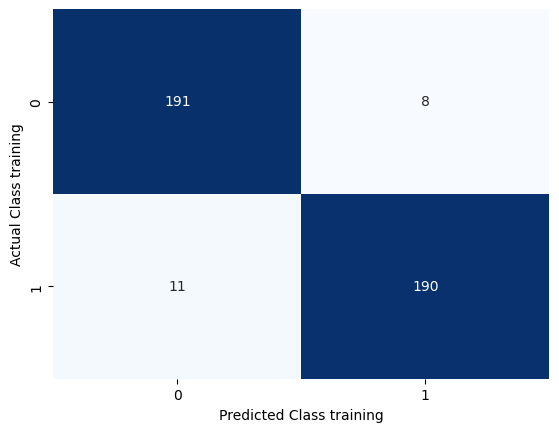

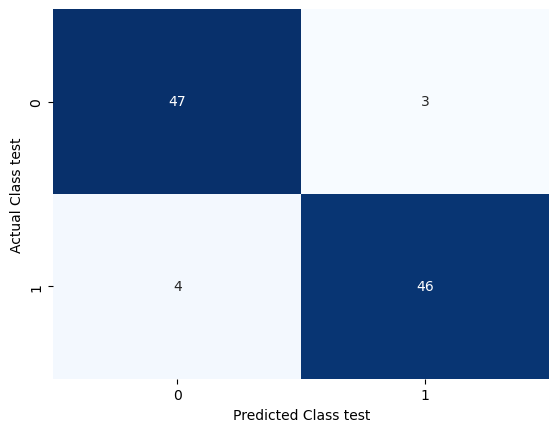

In [81]:
def acc(target, pred):
    correct_pred = 0
    for i in range(len(target)):
        if (target[i] == pred[i]):
            correct_pred += 1

    return correct_pred / len(target)


Y_preds = classifier1.predict(X_test)
Y_preds2 = classifier1.predict(X_train)

# Calculate accuracy here ...
print(f"Training Accuracy : {acc(Y_train, Y_preds2)}")
print(f"Test Accuracy: {acc(Y_test, Y_preds)}")

conf_mat_train = confusion_matrix(Y_train, Y_preds2)
sns.heatmap(conf_mat_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Class training')
plt.ylabel('Actual Class training')
plt.show()

conf_mat_test = confusion_matrix(Y_test, Y_preds)
sns.heatmap(conf_mat_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Class test')
plt.ylabel('Actual Class test')
plt.show()

**Performance metrics**
<article class="message is-info">
  <div class="message-header">Recall from the lecture</div>
  <div class="message-body">
  
  Performance metrics such as **precision**, **recall**, **F$_1$-score**, and **specificity**  provide different views of the performance of the classifier.
- **Precision** - or positive predictive value, represents how many predictions of the positive class actually belong to that class. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑃}
$$


- **Recall** -  also known as sensitivity, true positive rate, or hit rate assesses whether the classifier correctly identifies positive instances out of the total actual postive instances. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑁} 
$$


- **F$_1$-score** - harmonic mean of precision & recall. 

$$
2∗\frac{\text{Precision}∗\text{Recall}}{\text{Precision}+\text{Recall}} 
$$


- **Specificity** - also known as the true negative rate, is the percentage of correctly predicted instances of the negative class. 

$$
\frac{TN}{TN+FP} 
$$




  
  </div>
</article>

<article class="message task"><a class="anchor" id="classif_report"></a>
    <div class="message-header">
        <span>Task 4: Performance metrics</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Use the confusion matrix from [Task 3](#accuracy) to find and store the true positive, false positive, true negative and false negative values. 

2. In the cell below calculate calculate the following evaluation metrics for the classification model:
    - Precision
    - Recall
    - F1-score
    - Specificity


3. Inspect the metrics and reflect on how they individually help in understanding and evaluating the performance of a classification model?




</div></article>



In [82]:
# write your solution here
true_positive_test = conf_mat_test[1,1]
true_negative_test = conf_mat_test[0,0]
false_positive_test = conf_mat_test[0,1]
false_negative_test = conf_mat_test[1,0]

precision_test = true_positive_test /  (true_positive_test + false_positive_test)
recall_test = true_positive_test /  (true_positive_test + false_negative_test)
f1_score = 2 * ((precision_test * recall_test) / (precision_test + recall_test))
specificity = true_negative_test / (true_negative_test + false_positive_test)

print(f"Precision - when the cost of false positives is high: {precision_test.round(3)}")
print(f"Recall - when the cost of false negatives is high: {recall_test.round(3)}")
print(f"Specificity - when focus is on correctly identifying negative instances: {specificity.round(3)}")
print(f"F1-score - the harmonic mean: {f1_score.round(3)}")




Precision - when the cost of false positives is high: 0.939
Recall - when the cost of false negatives is high: 0.92
Specificity - when focus is on correctly identifying negative instances: 0.94
F1-score - the harmonic mean: 0.929


## Imbalanced Classes
The cell below generates a dataset with 1,000 samples across 10 classes. Then an imbalanced dataset is created by combining 9 classes such that all samples in class 0 are marked as positive, while samples in the remaining classes are marked as negative. This results in a 10% positive and 90% negative distribution.


In [83]:
X, Y = datasets.make_classification(n_samples=1000, n_classes=10, n_informative=10)

# Mark the minority class as True
Y = (Y == 0).astype(int)

print('Dataset Size:', X.shape, Y.shape)

# Check the imbalance ratio
imbalance_ratio_actual = np.mean(Y)
print(f'Imbalance Ratio (Positive/Minority Class): {imbalance_ratio_actual:.2f}')

Dataset Size: (1000, 20) (1000,)
Imbalance Ratio (Positive/Minority Class): 0.10


<article class="message task"><a class="anchor" id="svc_model"></a>
    <div class="message-header">
        <span>Task 5: Class Imbalance</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights hard"></i>
        </span>
    </div>
<div class="message-body">


The following task will evaluate `classifier2`
 on the imbalanced dataset.
1. The cell below includes the classifier, variables to store performance metrics, and an incomplete for-loop that performs data splitting for 5-fold cross-validation. Complete the loop to:
    - Train `classifier2`
 on the training folds. 
    - Predict labels on the validation folds.
    - Calculate accuracy on the validation folds and store the values.


2. Run the cell below to plot the accuracy of the model on each fold. What does the plot tell you about classification performance?

3. Extend the loop to calculate the confusion matrix and the performance metrics on the validation sets (precision, recall, F1-Score, specificity). Print the average of each metric (use `np.nanmean()`
 as some of these metrics might inlcude NaNs). 

4. Why do some of the metrics return NaNs?

5. Is the model able to reliably identify the minority class? What are the implications for the model's performance and its practical utility?

6. Run the cell below to plot all the metrics in the same plot. Are certain metrics consistently lower, especially for the minority class? What might this indicate about the model’s handling of the imbalanced data?




</div></article>



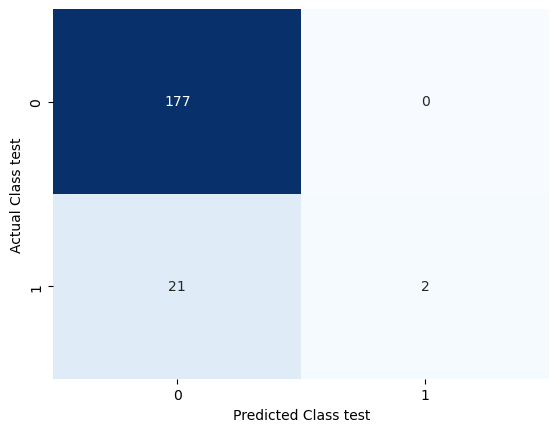

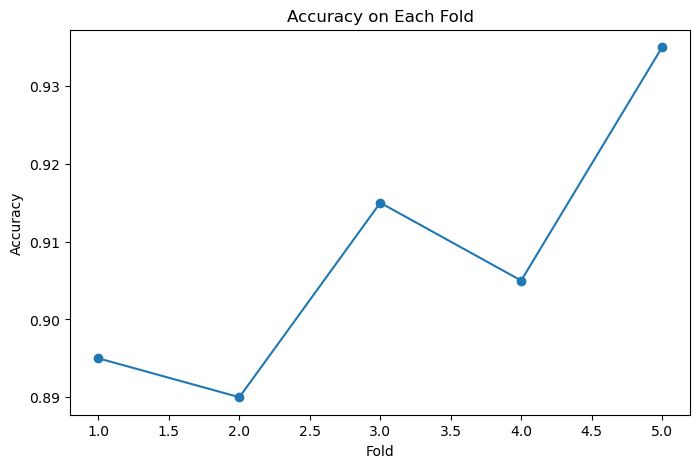

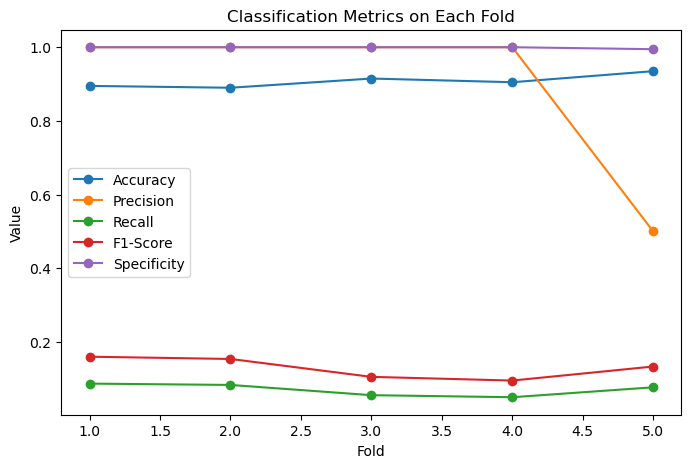

Mean Classification Metrics Across Folds:
Mean Accuracy: 0.908
Mean Precision: 0.9
Mean Recall: 0.071
Mean Specificity: 0.999
Mean F1-Score: 0.13


In [87]:
classifier2 = SVC()

accuracies= []
accuracies, precisions, recalls, f1_scores, specificities = [], [], [], [], []

bool = True 

for train_idx_svc, test_idx_svc in KFold(n_splits=5, shuffle=False).split(X):
    X_train, X_test = X[train_idx_svc], X[test_idx_svc]
    Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]

    # write your solution here
    classifier2.fit(X_train, Y_train)

    Y_pred_train = classifier2.predict(X_train)
    Y_pred_test = classifier2.predict(X_test)

    acc_test = accuracy_score(Y_test, Y_pred_test)
    # acc_train =  accuracy_score(Y_train, Y_pred_train)
    accuracies.append(acc_test)

    conf_mat_test = confusion_matrix(Y_test, Y_pred_test)

    # Plot the first confusion matrix
    if bool:
        sns.heatmap(conf_mat_test, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel('Predicted Class test')
        plt.ylabel('Actual Class test')
        plt.show()
        # Delete later maybe

    true_positive_test = conf_mat_test[1,1]
    true_negative_test = conf_mat_test[0,0]
    false_positive_test = conf_mat_test[0,1]
    false_negative_test = conf_mat_test[1,0]

    precision_test = true_positive_test / (true_positive_test + false_positive_test)
    recall_test = true_positive_test / (true_positive_test + false_negative_test)
    f1score_test = 2 * ((precision_test * recall_test) / (precision_test + recall_test))
    specificity_test = true_negative_test / (true_negative_test + false_positive_test)

    precisions.append(precision_test)
    recalls.append(recall_test)
    f1_scores.append(f1score_test)
    specificities.append(specificity_test)
    bool = False



# Step 2
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), accuracies, marker='o')
plt.title('Accuracy on Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

# step 5
# Create a list of metric names for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']

# Create a list of the values for each metric
metric_values = [accuracies, precisions, recalls, f1_scores, specificities]


# Plot the metrics on the same plot
plt.figure(figsize=(8, 5))
for i, metric_values_list in enumerate(metric_values):
    plt.plot(range(1, 6), metric_values_list, marker='o', label=metrics[i])

plt.title('Classification Metrics on Each Fold')
plt.xlabel('Fold')
plt.ylabel('Value')
plt.legend()
plt.show()

print("Mean Classification Metrics Across Folds:")
print(f"Mean Accuracy: {np.nanmean(accuracies).round(3)}")
print(f"Mean Precision: {np.nanmean(precisions).round(3)}")
print(f"Mean Recall: {np.nanmean(recalls).round(3)}")
print(f"Mean Specificity: {np.nanmean(specificities).round(3)}")
print(f"Mean F1-Score: {np.nanmean(f1_scores).round(3)}")


In [85]:
# write your reflections here
'''
Why do some of the metrics return NaNs?
    Because you divide by something that potentially could be 0

Is the model able to reliably identify the minority class? What are the implications for the model's performance and its practical utility?
    No it is not, that is why recall is so low. It is better trained to find true negatives than true positives as it has been trained on more negatives than positives.

Run the cell below to plot all the metrics in the same plot. Are certain metrics consistently lower, especially for the minority class? What might this indicate about the model’s handling of the imbalanced data?
    It indicates that it is better at finding true negatives than true positives as we can see that F1-score is low. It indicates that even though the model has a high accuracy,
    we can see that the model has been trained on a imbalanced dataset.
'''

"\nWhy do some of the metrics return NaNs?\n    Because you divide by something that potentially could be 0\n\nIs the model able to reliably identify the minority class? What are the implications for the model's performance and its practical utility?\n    No it is not, that is why recall is so low. It is better trained to find true negatives than true positives as it has been trained on more negatives than positives.\n\nRun the cell below to plot all the metrics in the same plot. Are certain metrics consistently lower, especially for the minority class? What might this indicate about the model’s handling of the imbalanced data?\n    It indicates that it is better at finding true negatives than true positives as we can see that F1-score is low. It indicates that even though the model has a high accuracy,\n    we can see that the model has been trained on a imbalanced dataset.\n"

## ROC Curves and Precision-Recall Curves
This task examines the ROC (Receiver Operating Characteristic) curve and the Precision-Recall curve for the classifier trained on the imbalanced dataset. The ROC curve illustrates the trade-off between true positive rate (sensitivity) and false positive rate, while the Precision-Recall curve shows the balance between precision and recall.
<article class="message task"><a class="anchor" id="metrics"></a>
    <div class="message-header">
        <span>Task 6: ROC and Precision-Recall curves</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


The cell below divides the dataset (imbalanced) into a training and a test set. It also calculates both the ROC curve and the Precision-Recall curve and extracts relevant metrics such as: `fpr`
 (False Positive Rate), `tpr`
 (True Positive Rate or **recall**), and **precision**.
1. Run the cell below to plot the ROC curve and the Precision-Recall curve.
2. Use the confusion matrix metrics to argue how the plots provide different insights into the classification model's ability to handle class imbalance? 
3. Describe when and why you would prioritize one curve over the other when dealing with imbalanced data.



</div></article>



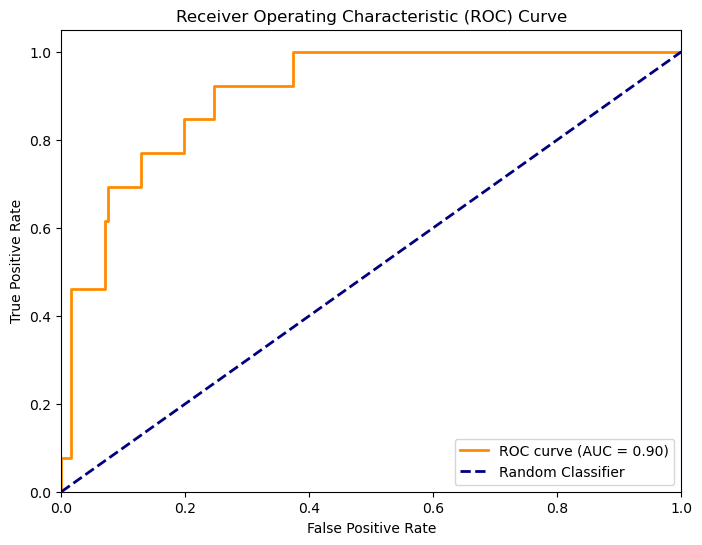

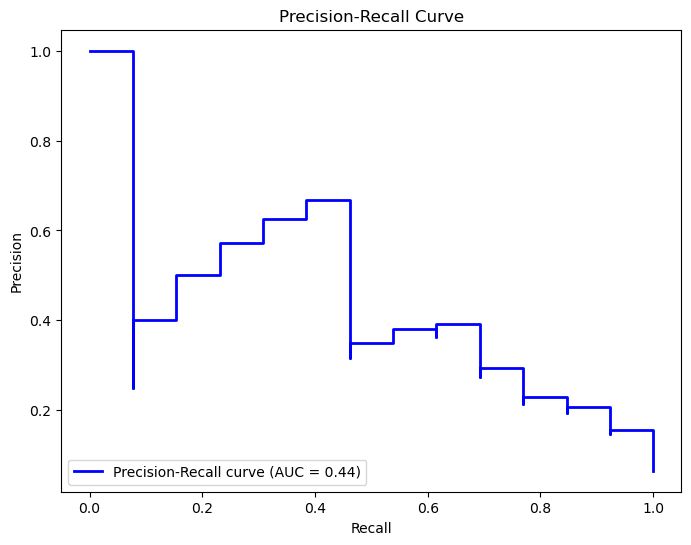

"\nUse the confusion matrix metrics to argue how the plots provide different insights into the classification model's ability to handle class imbalance?\n\n\nDescribe when and why you would prioritize one curve over the other when dealing with imbalanced data.\n"

In [86]:
X_train, X_test = X[train_idx_svc], X[test_idx_svc]
Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]

# ROC curve
decision_function = classifier2.decision_function(X_test)
fpr, tpr, _ = roc_curve(Y_test, decision_function)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, decision_function)
pr_auc = average_precision_score(Y_test, decision_function)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

'''
Use the confusion matrix metrics to argue how the plots provide different insights into the classification model's ability to handle class imbalance?


Describe when and why you would prioritize one curve over the other when dealing with imbalanced data.
'''